In [1]:
#pip install -U imbalanced-learn

In [2]:
#conda install -c conda-forge imbalanced-learn

In [3]:
#conda install -c glemaitre imbalanced-learn

In [4]:
#!pip install imblearn

In [5]:
#conda install -c conda-forge imbalanced-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [7]:
#importing the data set
dataset=pd.read_csv("D:/Test/creditcard.csv")
#dataset

In [8]:
dataset.shape

(284807, 31)

In [9]:
#dataset.info()

In [10]:
#dataset.describe()

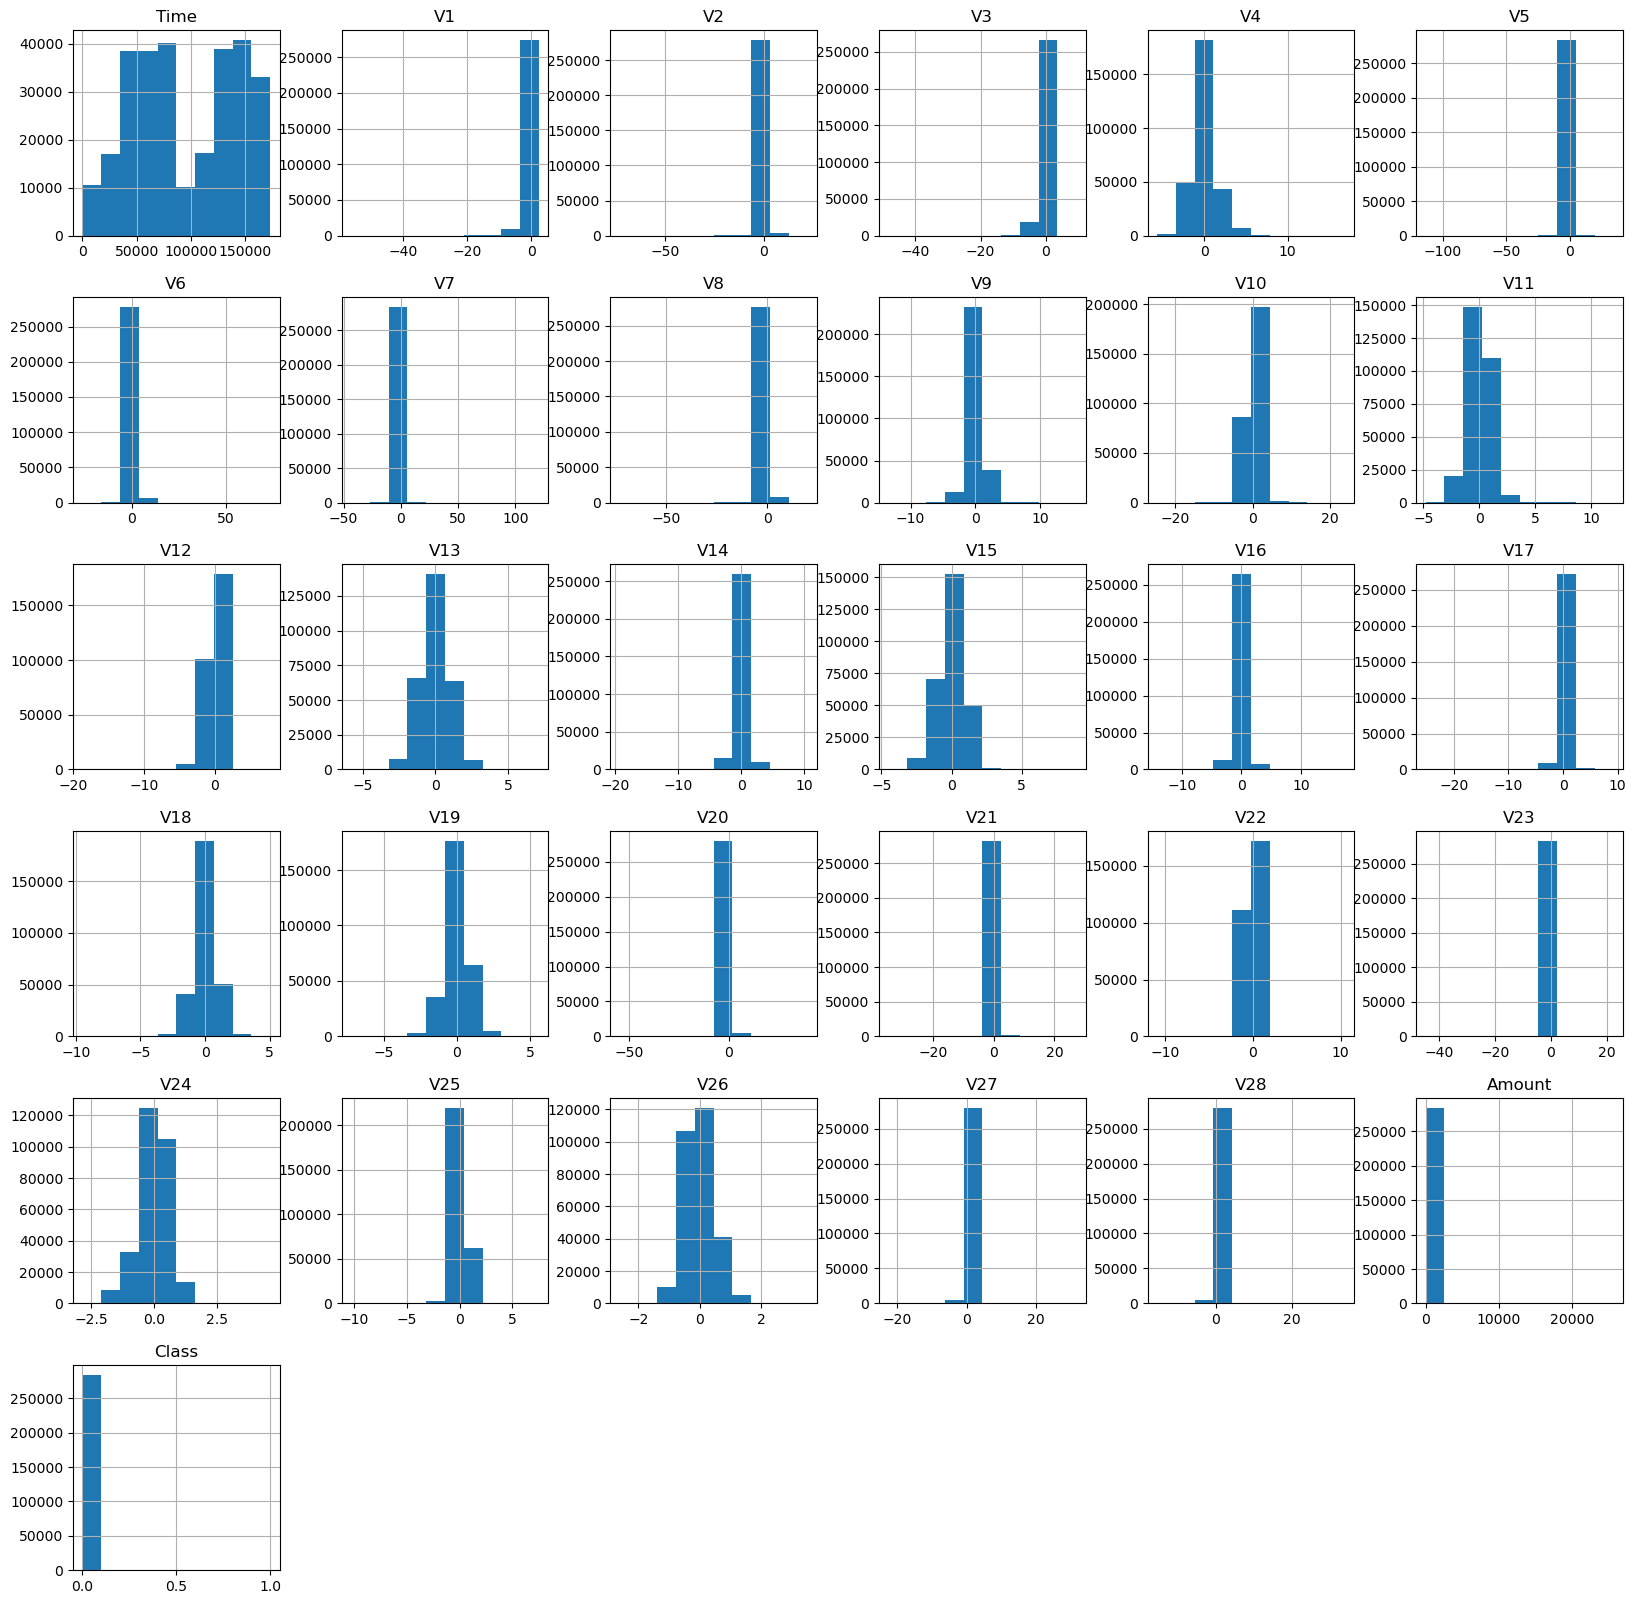

In [11]:
#EDA
# Plot histograms of each parameter 
dataset.hist(figsize = (20, 20))
plt.show()

In [12]:
# Determine number of fraud cases in dataset

Fraud = dataset[dataset['Class'] == 1]
Valid = dataset[dataset['Class'] == 0]


In [13]:
print(len(Fraud))
print(len(Valid))

492
284315


In [14]:
outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

0.0017304750013189597


In [15]:
print('Fraud Cases: {}'.format(len(dataset[dataset['Class'] == 1])))
print('Valid Transactions: {}'.format(len(dataset[dataset['Class'] == 0])))

Fraud Cases: 492
Valid Transactions: 284315


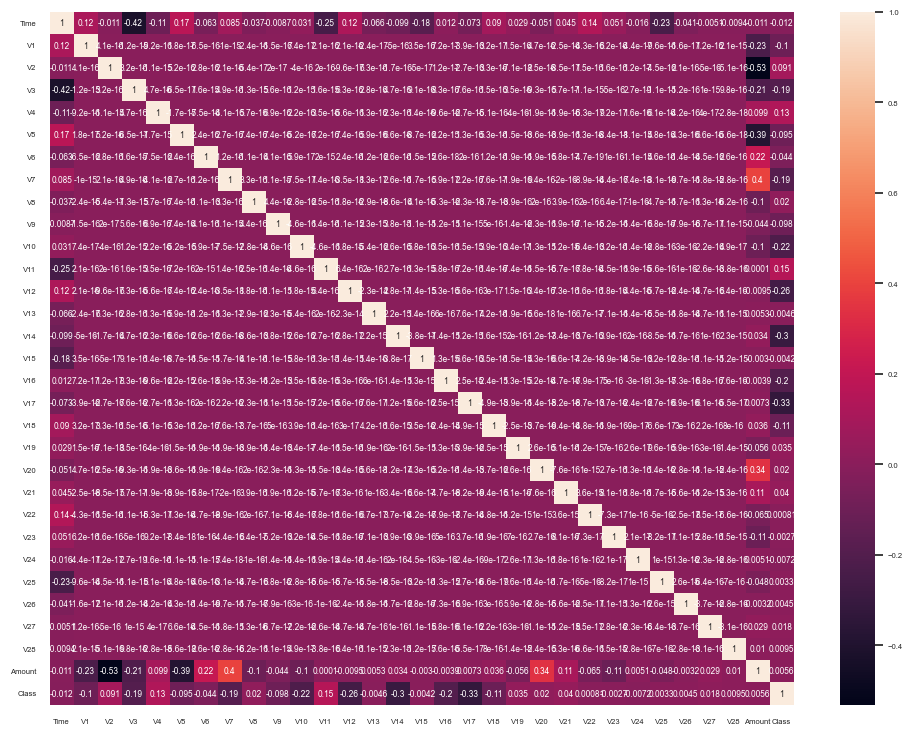

In [16]:
# Correlation matrix
corrmat = dataset.corr()
fig = plt.figure(figsize = (12, 9))

sns.set(font_scale=0.5)
sns.heatmap(corrmat, annot=True)
plt.show()

In [17]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [18]:
X.shape

(284807, 30)

In [19]:
y.shape

(284807,)

In [20]:
## Split the Dataset to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor


# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

In [22]:
# Fit the model
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)

<Figure size 900x700 with 0 Axes>

In [23]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

In [26]:
# Reshape the prediction values to 0 for valid, 1 for fraud. 
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
    
n_errors = (y_pred != y).sum()
    

In [27]:
    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(classification_report(y, y_pred))

Local Outlier Factor: 492
0.9982725143693799


C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.00      0.00      0.00       492

    accuracy                           1.00    284807
   macro avg       0.50      0.50      0.50    284807
weighted avg       1.00      1.00      1.00    284807



C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, y_pred)
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
print(TP)
print(TN)
print(FP)
print(FN)

284315
0
0
492


In [51]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9983


In [52]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0017


In [53]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 1.0000


In [54]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))


Recall or Sensitivity : 0.9983


In [55]:
#TPR = Recall =Sensitivity
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9983


In [56]:
#FPR
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_41220\663238629.py:2: RuntimeWarning: invalid value encountered in divide
  false_positive_rate = FP / float(FP + TN)


In [57]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : nan


C:\Users\DELL\AppData\Local\Temp\ipykernel_41220\3634116140.py:1: RuntimeWarning: invalid value encountered in longlong_scalars
  specificity = TN / (TN + FP)


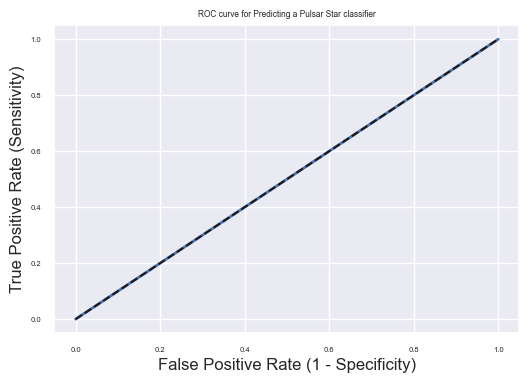

In [58]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y, y_pred)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Predicting a Pulsar Star classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [59]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y, y_pred)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5000
